In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("Set2", 10))

### 2.1 Testing the testbed

In [87]:
N_EPOCHS = 1000
EPS = [0,0.01,0.1]
N_BANDITS = 10
N_EXPERIMENTS = 2000


def run_bandit_experiment(n_bandits=10, n_epochs=1000, n_exp=2000, eps=[0,0.01,0.1]):
    rewards = np.zeros((len(eps), n_epochs, n_exp))
    best_actions = np.zeros((len(eps), n_epochs, n_exp))
    for exp in range(n_exp):
        #generate a problem
        q = np.random.normal(size=N_BANDITS)
        REWS = [np.random.normal(loc=q[i]) for i in range(N_BANDITS)]
        best_bandit = np.argmax(REWS)
        for e in range(len(eps)):
            Q = np.zeros(n_bandits)
            N = np.zeros(n_bandits)
            for i in range(n_epochs):
                if np.random.random() < eps[e]:
                    cb = np.random.randint(n_bandits)
                else:
                    cb = np.argmax([np.random.normal(loc=Q[i]) for i in range(N_BANDITS)])
                R = REWS[cb]
                N[cb]+=1
                Q[cb]+=(R-Q[cb])/N[cb]
                rewards[e][i][exp]=R
                if cb == best_bandit:
                    best_actions[e][i][exp] = 1
    return rewards, best_actions

r, ba = run_bandit_experiment( N_BANDITS, N_EPOCHS, N_EXPERIMENTS, EPS)

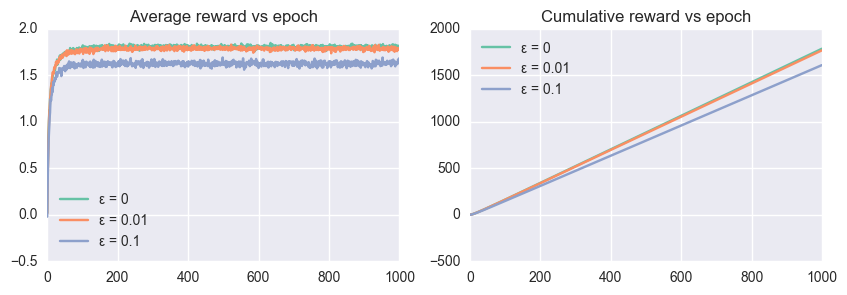

In [88]:
f, (ax0, ax1) = sns.plt.subplots(1,2, figsize=(10,3))
ax0.set_title('Average reward vs epoch')
ax1.set_title('Cumulative reward vs epoch')
for l, cr in enumerate(r):
    cm = np.mean(cr, axis=1)
    ax0.plot(cm, label=u"\u03B5 = {}".format(EPS[l]))
    ax1.plot(np.cumsum(cm), label=u"\u03B5 = {}".format(EPS[l]))
ax0.legend(loc='best');
ax1.legend(loc='best');

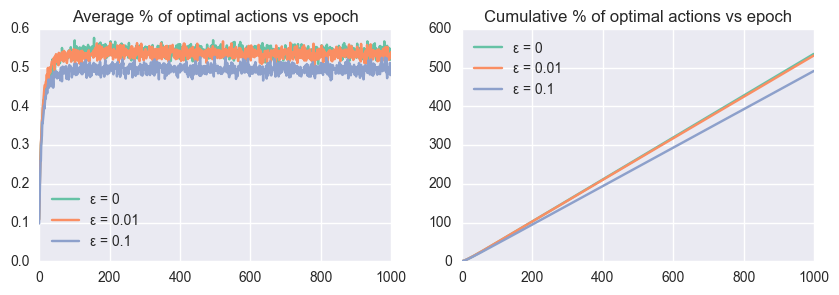

In [89]:
f, (ax0, ax1) = sns.plt.subplots(1,2, figsize=(10,3))
ax0.set_title('Average % of optimal actions vs epoch')
ax1.set_title('Cumulative % of optimal actions vs epoch')
for l, cb in enumerate(ba):
    cm = np.mean(cb, axis=1)
    ax0.plot(cm, label=u"\u03B5 = {}".format(EPS[l]))
    ax1.plot(np.cumsum(cm), label=u"\u03B5 = {}".format(EPS[l]))
ax0.legend(loc='best');
ax1.legend(loc='best');